In [85]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

In [2]:
match_data = pd.read_excel (r'2021_LCK_Ban_Pick.xlsx')
match_data = match_data.fillna(method='ffill')
match_data[['Date', 'Result','Match']] = match_data[['Date', 'Result','Match']].astype('int64')
match_data

,Date,Patch,Match,Team,Game,Side,Pick_1,Pick_2,Pick_3,Pick_4,...,Ban_4,Ban_5,Top,Jungle,Mid,ADC,Support,Result,POG,POG_Position
0,210609,11.11,1,BRO,1,Blue,Lucian,Kalista,Gnar,Lillia,...,Ezreal,Akali,Gnar,Lillia,Lucian,Kalista,Gragas,1,Lava,Mid
1,210609,11.11,1,LSB,1,Red,Leesin,Olaf,Viktor,Jhin,...,Nautilus,Diana,Leesin,Olaf,Viktor,Jhin,Karma,0,Lava,Mid
2,210609,11.11,1,LSB,2,Blue,Renekton,Rumble,Jayce,Jhin,...,Nautilus,Azir,Jayce,Rumble,Renekton,Jhin,Tahm Kench,0,Lava,Mid
3,210609,11.11,2,BRO,2,Red,Leesin,Gnar,Kalista,Akali,...,Ezreal,Alistar,Gnar,Leesin,Akali,Kalista,Rakan,1,Lava,Mid
4,210609,11.11,2,T1,1,Blue,Ezreal,Nocturne,Gwen,Rumble,...,Akali,Sett,Gwen,Rumble,Nocturne,Ezreal,Leona,1,Cuzz,Jungle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,210627,11.12,30,LSB,1,Red,Sett,Lucian,Diana,Jhin,...,Gnar,Nocturne,Sett,Diana,Lucian,Jhin,Leona,0,Doran,Top
144,210627,11.12,30,LSB,2,Blue,Ezreal,Diana,Sett,Rakan,...,Azir,Jayce,Gnar,Diana,Sett,Ezreal,Rakan,1,Summit,Top
145,210627,11.12,30,KT,2,Red,Varus,Volibear,Thresh,Ryze,...,Leona,Gragas,Kennen,Volibear,Ryze,Varus,Thresh,0,Summit,Top
146,210627,11.12,30,KT,3,Blue,Rumble,Xinzhao,Ryze,Senna,...,Gnar,Jayce,Rumble,Xinzhao,Ryze,Senna,Tahm Kench,0,Effort,Support


In [66]:
# 각 라인별 챔피언 풀 데이터 셋 만들기

total_game_count = int(len(match_data)/2)

top_champions_data = match_data['Top'].value_counts()
top_champions = DataFrame(top_champions_data)
top_champions.columns = ['Picked']
top_champions['Banned'] = 0
top_champions['Win'] = 0
top_champions['Lose'] = 0
for champion in top_champions.index:
    top_champions['Banned'][champion] = len(match_data.loc[(match_data['Ban_1']==champion) | (match_data['Ban_2']==champion) | (match_data['Ban_3']==champion) | (match_data['Ban_4']==champion) | (match_data['Ban_5']==champion)])
    result = match_data[match_data['Top'] == champion]['Result'].value_counts()
    for value in result.index:
        if value == 1:
            top_champions['Win'][champion] = result[1]
        if value == 0:
            top_champions['Lose'][champion] = result[0]
            
top_champions['Pick_Rate'] = top_champions['Picked']/total_game_count*100
top_champions['Ban_Rate'] = top_champions['Banned']/total_game_count*100
top_champions['Pick_Ban_Rate'] = top_champions['Pick_Rate'] + top_champions['Ban_Rate']
top_champions['Win%'] = top_champions['Win']/(top_champions['Win'] + top_champions['Lose'])*100
top_champions = top_champions.round(decimals=5)

jng_champions_data = match_data['Jungle'].value_counts()
jng_champions = DataFrame(jng_champions_data)
jng_champions.columns =['Picked']
jng_champions['Banned'] = 0
jng_champions['Win'] = 0
jng_champions['Lose'] = 0
for champion in jng_champions.index:
    jng_champions['Banned'][champion] = len(match_data.loc[(match_data['Ban_1']==champion) | (match_data['Ban_2']==champion) | (match_data['Ban_3']==champion) | (match_data['Ban_4']==champion) | (match_data['Ban_5']==champion)])
    result = match_data[match_data['Jungle'] == champion]['Result'].value_counts()
    for value in result.index:
        if value == 1:
            jng_champions['Win'][champion] = result[1]
        if value == 0:
            jng_champions['Lose'][champion] = result[0]

jng_champions['Pick_Rate'] = jng_champions['Picked']/total_game_count*100
jng_champions['Ban_Rate'] = jng_champions['Banned']/total_game_count*100
jng_champions['Pick_Ban_Rate'] = jng_champions['Pick_Rate'] + jng_champions['Ban_Rate']
jng_champions['Win%'] = jng_champions['Win']/(jng_champions['Win'] + jng_champions['Lose'])*100
jng_champions = jng_champions.round(decimals=5)

mid_champions_data = match_data['Mid'].value_counts()
mid_champions = DataFrame(mid_champions_data)
mid_champions.columns =['Picked']
mid_champions['Banned'] = 0
mid_champions['Win'] = 0
mid_champions['Lose'] = 0
for champion in mid_champions.index:
    mid_champions['Banned'][champion] = len(match_data.loc[(match_data['Ban_1']==champion) | (match_data['Ban_2']==champion) | (match_data['Ban_3']==champion) | (match_data['Ban_4']==champion) | (match_data['Ban_5']==champion)])
    result = match_data[match_data['Mid'] == champion]['Result'].value_counts()
    for value in result.index:
        if value == 1:
            mid_champions['Win'][champion] = result[1]
        if value == 0:
            mid_champions['Lose'][champion] = result[0]

mid_champions['Pick_Rate'] = mid_champions['Picked']/total_game_count*100
mid_champions['Ban_Rate'] = mid_champions['Banned']/total_game_count*100
mid_champions['Pick_Ban_Rate'] = mid_champions['Pick_Rate'] + mid_champions['Ban_Rate']
mid_champions['Win%'] = mid_champions['Win']/(mid_champions['Win'] + mid_champions['Lose'])*100
mid_champions = mid_champions.round(decimals=5)

bot_champions_data = match_data['ADC'].value_counts()
bot_champions = DataFrame(bot_champions_data)
bot_champions.columns =['Picked']
bot_champions['Banned'] = 0
bot_champions['Win'] = 0
bot_champions['Lose'] = 0
for champion in bot_champions.index:
    bot_champions['Banned'][champion] = len(match_data.loc[(match_data['Ban_1']==champion) | (match_data['Ban_2']==champion) | (match_data['Ban_3']==champion) | (match_data['Ban_4']==champion) | (match_data['Ban_5']==champion)])
    result = match_data[match_data['ADC'] == champion]['Result'].value_counts()
    for value in result.index:
        if value == 1:
            bot_champions['Win'][champion] = result[1]
        if value == 0:
            bot_champions['Lose'][champion] = result[0]

bot_champions['Pick_Rate'] = bot_champions['Picked']/total_game_count*100
bot_champions['Ban_Rate'] = bot_champions['Banned']/total_game_count*100
bot_champions['Pick_Ban_Rate'] = bot_champions['Pick_Rate'] + bot_champions['Ban_Rate']
bot_champions['Win%'] = bot_champions['Win']/(bot_champions['Win'] + bot_champions['Lose'])*100
bot_champions = bot_champions.round(decimals=5)

sup_champions_data = match_data['Support'].value_counts()
sup_champions = DataFrame(sup_champions_data)
sup_champions.columns =['Picked']
sup_champions['Banned'] = 0
sup_champions['Win'] = 0
sup_champions['Lose'] = 0
for champion in sup_champions.index:
    sup_champions['Banned'][champion] = len(match_data.loc[(match_data['Ban_1']==champion) | (match_data['Ban_2']==champion) | (match_data['Ban_3']==champion) | (match_data['Ban_4']==champion) | (match_data['Ban_5']==champion)])
    result = match_data[match_data['Support'] == champion]['Result'].value_counts()
    for value in result.index:
        if value == 1:
            sup_champions['Win'][champion] = result[1]
        if value == 0:
            sup_champions['Lose'][champion] = result[0]

sup_champions['Pick_Rate'] = sup_champions['Picked']/total_game_count*100
sup_champions['Ban_Rate'] = sup_champions['Banned']/total_game_count*100
sup_champions['Pick_Ban_Rate'] = sup_champions['Pick_Rate'] + sup_champions['Ban_Rate']            
sup_champions['Win%'] = sup_champions['Win']/(sup_champions['Win'] + sup_champions['Lose'])*100
sup_champions = sup_champions.round(decimals=5)

top_champions

,Picked,Banned,Win,Lose,Pick_Rate,Ban_Rate,Pick_Ban_Rate,Win%
Gwen,23,18,11,12,31.08108,24.32432,55.40541,47.82609
Gnar,23,22,12,11,31.08108,29.72973,60.81081,52.17391
Leesin,19,33,11,8,25.67568,44.59459,70.27027,57.89474
Nocturne,16,34,10,6,21.62162,45.94595,67.56757,62.50000
Sett,14,15,7,7,18.91892,20.27027,39.18919,50.00000
Viego,9,13,3,6,12.16216,17.56757,29.72973,33.33333
Jayce,8,18,4,4,10.81081,24.32432,35.13514,50.00000
Renekton,6,59,2,4,8.10811,79.72973,87.83784,33.33333
Rumble,4,22,1,3,5.40541,29.72973,35.13514,25.00000
Wukong,3,3,2,1,4.05405,4.05405,8.10811,66.66667


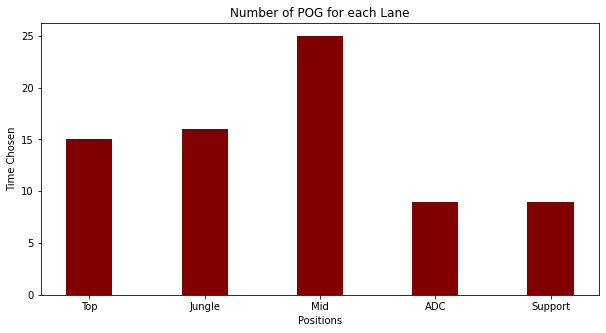

In [26]:
POG_Dist = match_data['POG_Position'].value_counts()/2
POG_Dist = dict(POG_Dist)
POG_Dist = OrderedDict(POG_Dist)
POG_Dist.move_to_end('Jungle')
POG_Dist.move_to_end('Mid')
POG_Dist.move_to_end('ADC')
POG_Dist.move_to_end('Support')

positions = list(POG_Dist.keys())
values = list(POG_Dist.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(positions, values, color = 'maroon', width = 0.4)
plt.xlabel("Positions")
plt.ylabel("Time Chosen")
plt.title("Number of POG for each Lane")
plt.show()

In [53]:
all_champions=set(list(pd.concat([match_data['Top'],match_data['Jungle'],match_data['Mid'], match_data['ADC'], match_data['Support'],match_data['Ban_1'],match_data['Ban_2'],match_data['Ban_3'],match_data['Ban_4'],match_data['Ban_5']]).unique()))
champions_data = DataFrame(index = sorted(all_champions))
champions_data['Top'] = 0
champions_data['Jng'] = 0
champions_data['Mid'] = 0
champions_data['Bot'] = 0
champions_data['Sup'] = 0
champions_data['Num_lane'] = 0
champions_data

,Top,Jng,Mid,Bot,Sup,Num_lane
Aatrox,0,0,0,0,0,0
Akali,0,0,0,0,0,0
Alistar,0,0,0,0,0,0
Aphelios,0,0,0,0,0,0
Azir,0,0,0,0,0,0
...,...,...,...,...,...,...
Yasuo,0,0,0,0,0,0
Yone,0,0,0,0,0,0
Yuumi,0,0,0,0,0,0
Zilean,0,0,0,0,0,0


In [54]:
# 챔피언 라인 확인 함수
def check_lane(champion_name):
    possible_lane = []
    if champion_name in top_champions.index:
        possible_lane.append('Top')
    if champion_name in jng_champions.index:
        possible_lane.append('Jng')
    if champion_name in mid_champions.index:
        possible_lane.append('Mid')
    if champion_name in bot_champions.index:
        possible_lane.append('Bot')
    if champion_name in sup_champions.index:
        possible_lane.append('Sup')
    return possible_lane

In [80]:
# 챔피언 별 가능한 라인 데이터 프레임
for champion in champions_data.index:
    possible_lane = check_lane(champion)
    champions_data['Num_lane'][champion] = len(possible_lane)
    for lane in possible_lane:
        champions_data[lane][champion] = 1
          
champions_data = champions_data.sort_values(by=['Num_lane'], ascending=False)
champions_data

,Top,Jng,Mid,Bot,Sup,Num_lane
Leesin,1,1,1,1,1,5
Karma,1,0,1,1,1,4
Sett,1,1,1,0,1,4
Nocturne,1,1,1,0,0,3
Volibear,1,1,1,0,0,3
Viego,1,1,1,0,0,3
Rumble,1,1,1,0,0,3
Lulu,1,0,1,0,1,3
Senna,0,0,0,1,1,2
Lucian,1,0,1,0,0,2


In [151]:
# 챔피언 점수 계산 함수
def get_score(Pick_Ban_Rate, Pick_Rate, WR):
    return Pick_Ban_Rate*Pick_Rate*WR/100

In [152]:
champion_score = DataFrame(index=sorted(champions_data.index))
champion_score['Top'] = 0
champion_score['Jng'] = 0
champion_score['Mid'] = 0
champion_score['Bot'] = 0
champion_score['Sup'] = 0

for champion in champions_data.index:
    for lane in ['Top', 'Jng', 'Mid', 'Bot', 'Sup']:
        if champions_data[lane][champion] == 1:
            if lane == 'Top':
                champion_score[lane][champion] = get_score(top_champions['Pick_Ban_Rate'][champion], top_champions['Pick_Rate'][champion], top_champions['Win%'][champion])
            if lane == 'Jng':
                champion_score[lane][champion] = get_score(jng_champions['Pick_Ban_Rate'][champion], jng_champions['Pick_Rate'][champion], jng_champions['Win%'][champion])
            if lane == 'Mid':
                champion_score[lane][champion] = get_score(mid_champions['Pick_Ban_Rate'][champion], mid_champions['Pick_Rate'][champion], mid_champions['Win%'][champion])
            if lane == 'Bot':
                champion_score[lane][champion] = get_score(bot_champions['Pick_Ban_Rate'][champion], bot_champions['Pick_Rate'][champion], bot_champions['Win%'][champion])
            if lane == 'Sup':        
                champion_score[lane][champion] = get_score(sup_champions['Pick_Ban_Rate'][champion], sup_champions['Pick_Rate'][champion], sup_champions['Win%'][champion])
champion_score

,Top,Jng,Mid,Bot,Sup
Aatrox,3,0,0,0,0
Akali,111,0,1426,0,0
Alistar,0,0,0,0,43
Aphelios,0,0,0,0,0
Azir,0,0,332,0,0
Bard,0,0,0,0,0
Braum,0,0,0,0,127
Caitlyn,0,0,0,0,0
Camille,5,0,0,0,0
DIana,0,0,0,0,0


In [77]:
# 각 라인별 성적 계산 
# champions_stat = pd.read_csv ('2021_Champions/2021_LCK_Champions_11.11_11.12.csv')
# champions_stat = champions_stat[champions_stat['Pos'].map(len)>2]
# champions_stat = champions_stat.sort_values(by='W%', ascending=False)
# champions_stat

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
38,Akali,Middle,13,17.8%,79.5%,101.4%,77%,31%,70,22,...,-142,9,-6.8,8.3,23.3%,519,25.8%,23.9%,0.34,0.18
76,Volibear,Jungle,12,16.4%,8.2%,27.4%,75%,50%,33,20,...,-243,-268,-8.3,5.1,13.6%,228,11.5%,16.3%,0.67,0.46
32,Sett,Support,4,5.5%,20.5%,79.5%,75%,0%,5,8,...,463,233,28.5,3.8,9.9%,213,11.2%,13.5%,1.03,0.48
83,Kalista,ADC,20,27.4%,43.8%,71.2%,70%,40%,72,34,...,350,158,17.7,10.1,33.1%,380,21.1%,26.7%,0.94,0.53
53,Sett,Middle,26,35.6%,20.5%,79.5%,69%,27%,63,61,...,-92,-150,-5.5,7.9,21.6%,393,20.2%,21.2%,0.39,0.3
19,Wukong,Top,3,4.1%,4.1%,8.2%,67%,67%,8,4,...,-365,-60,-14.3,7.7,24.1%,334,21.9%,22.1%,0.38,0.19
29,Rakan,Support,12,16.4%,11.0%,27.4%,67%,83%,3,33,...,-80,-3,-1.3,1.3,3.2%,130,7.5%,8.7%,2,0.57
10,Lucian,Top,3,4.1%,78.1%,91.8%,67%,0%,7,4,...,744,142,25.7,9.8,31.8%,464,25.7%,27.7%,0.29,0.44
8,Kennen,Top,3,4.1%,1.4%,5.5%,67%,100%,10,9,...,331,258,11.7,7.6,21.3%,391,22.9%,20.7%,0.56,0.32
46,Lulu,Middle,3,4.1%,23.3%,34.2%,67%,67%,2,6,...,172,63,-1.3,6.7,16.3%,350,14.8%,17.4%,0.38,0.22


In [135]:
get_score(top_champions['Pick_Ban_Rate']['Lucian'], top_champions['Win%']['Lucian'])

10.164029748180546

In [136]:
top_champions['Pick_Ban_Rate']['Lucian']

81.08108

In [137]:
top_champions['Win%']['Lucian']

66.66667